In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hearing_test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


<Axes: xlabel='age', ylabel='physical_score'>

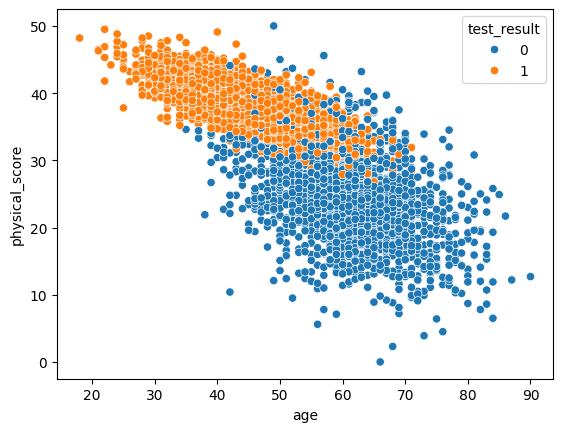

In [5]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

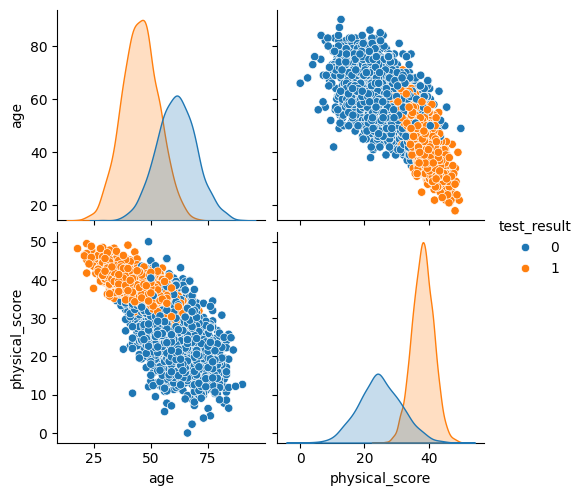

In [6]:
sns.pairplot(df,hue='test_result')

<Axes: xlabel='test_result', ylabel='count'>

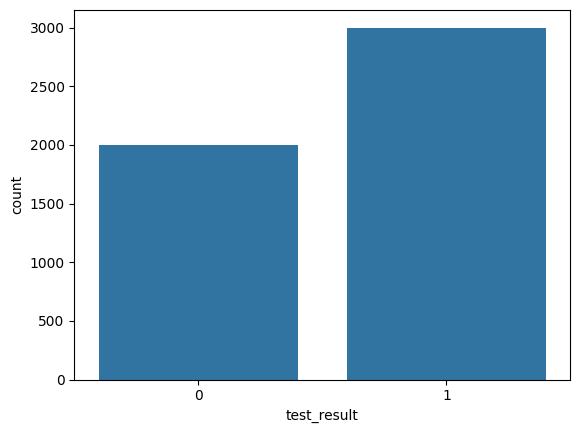

In [7]:
sns.countplot(data=df, x='test_result')

In [8]:
for column in df.columns:
    corr = np.corrcoef(df['test_result'],df[column])
    print(f"Correlation between test result and {column} = {corr[0][1]}")

Correlation between test result and age = -0.6831706796301823
Correlation between test result and physical_score = 0.7927158178562392
Correlation between test result and test_result = 1.0


In [9]:
x = df.drop('test_result', axis=1)
y = df['test_result']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(criterion='entropy')

model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_prediction = model.predict(x_test)

In [13]:
print(y_prediction)

[0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 

In [15]:
import graphviz
from sklearn import tree

In [16]:
dot_data = tree.export_graphviz(model,out_file=None,
                                feature_names=x.columns,
                               filled=True,
                               rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)

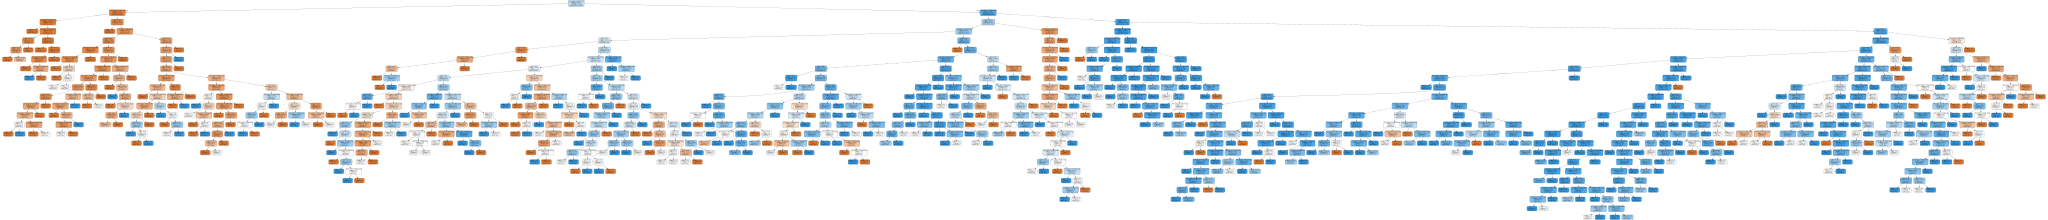

In [17]:
graph